In [1]:
# A logistic regression learning algorithm example using TensorFlow library.
# This example is using the MNIST database of handwritten digits 
# (http://yann.lecun.com/exdb/mnist/)

# Author: Aymeric Damien
# Project: https://github.com/aymericdamien/TensorFlow-Examples/

In [1]:
# Import MINST data
import sys
sys.path.insert(0,"../../")


In [2]:
import input_data


In [3]:
input_data.urllib.request.urlretrieve

<function urllib.request.urlretrieve(url, filename=None, reporthook=None, data=None)>

In [6]:
#     # @aman - python 3 has updated it - read this answer - #  https://stackoverflow.com/questions/17960942/attributeerror-module-object-has-no-attribute-urlretrieve
#     # filepath, _ = urllib.urlretrieve(SOURCE_URL + filename, filepath)
    


In [8]:
# mnist = input_data.read_data_sets("/tmp/data/", one_hot=True)

Extracting /tmp/data/train-images-idx3-ubyte.gz


TypeError: only integer scalar arrays can be converted to a scalar index

In [12]:
import tensorflow as tf

In [9]:
%%time
# @aman - the below code used as a replacement of above(not working/commented code)
# mnist = input_data.read_data_sets("/tmp/data/", one_hot=True)

# working
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets('MNIST_data', one_hot=True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use urllib or similar directly.
Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data\train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data\train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting MNIST_data\t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting MNIST_data\t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py fr

In [25]:
mnist

Datasets(train=<tensorflow.contrib.learn.python.learn.datasets.mnist.DataSet object at 0x00000253EB9C0630>, validation=<tensorflow.contrib.learn.python.learn.datasets.mnist.DataSet object at 0x00000253F363EB38>, test=<tensorflow.contrib.learn.python.learn.datasets.mnist.DataSet object at 0x00000253F363E978>)

In [30]:
# Parameters
learning_rate = 0.01
training_epochs = 50
batch_size = 100
display_step = 1

In [31]:
# tf Graph Input
x = tf.placeholder("float", [None, 784]) # mnist data image of shape 28*28=784
y = tf.placeholder("float", [None, 10]) # 0-9 digits recognition => 10 classes

In [32]:
# Create model

# Set model weights
W = tf.Variable(tf.zeros([784, 10]))
b = tf.Variable(tf.zeros([10]))

In [33]:
# Construct model
activation = tf.nn.softmax(tf.matmul(x, W) + b) # Softmax

In [34]:
# Minimize error using cross entropy
# Cross entropy
cost = -tf.reduce_sum(y*tf.log(activation)) 
# Gradient Descent
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost) 

In [35]:
# Initializing the variables
# @aman - old version
# init = tf.initialize_all_variables()
init = tf.global_variables_initializer()

In [36]:
# @aman -
cost_list = []
epochs_list = []
# Launch the graph
with tf.Session() as sess:
    sess.run(init)

    # Training cycle
    for epoch in range(training_epochs):
        avg_cost = 0.
        total_batch = int(mnist.train.num_examples/batch_size)
        # Loop over all batches
        for i in range(total_batch):
            batch_xs, batch_ys = mnist.train.next_batch(batch_size)
            # Fit training using batch data
            sess.run(optimizer, feed_dict={x: batch_xs, y: batch_ys})
            # Compute average loss
            avg_cost += sess.run(cost, feed_dict={x: batch_xs, y: batch_ys})/total_batch

        cost_list.append(avg_cost)
        epochs_list.append(epoch)
        
        # Display logs per epoch step
        if epoch % display_step == 0:
            print("Epoch:", '%04d' % (epoch+1), "cost=", "{:.9f}".format(avg_cost) )

    print("Optimization Finished!")

    # Test model
    correct_prediction = tf.equal(tf.argmax(activation, 1), tf.argmax(y, 1))
    # Calculate accuracy
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))
    print("Accuracy:", accuracy.eval({x: mnist.test.images, y: mnist.test.labels}) )

Epoch: 0001 cost= 30.378656751
Epoch: 0002 cost= 22.073285185
Epoch: 0003 cost= 21.034481119
Epoch: 0004 cost= 20.621809658
Epoch: 0005 cost= 20.155514137
Epoch: 0006 cost= 19.902934280
Epoch: 0007 cost= 19.591606616
Epoch: 0008 cost= 19.522200125
Epoch: 0009 cost= 19.392414566
Epoch: 0010 cost= 19.222383701
Epoch: 0011 cost= 19.192000722
Epoch: 0012 cost= 18.974000141
Epoch: 0013 cost= 18.905453926
Epoch: 0014 cost= 18.819052921
Epoch: 0015 cost= 18.835198205
Epoch: 0016 cost= 18.722855135
Epoch: 0017 cost= 18.647465580
Epoch: 0018 cost= 18.583329741
Epoch: 0019 cost= 18.447269658
Epoch: 0020 cost= 18.534110966
Epoch: 0021 cost= 18.453713155
Epoch: 0022 cost= 18.323797433
Epoch: 0023 cost= 18.361677837
Epoch: 0024 cost= 18.236903185
Epoch: 0025 cost= 18.273655792
Epoch: 0026 cost= 18.238881434
Epoch: 0027 cost= 18.118834745
Epoch: 0028 cost= 18.149135617
Epoch: 0029 cost= 18.113012264
Epoch: 0030 cost= 18.097451174
Epoch: 0031 cost= 18.018218013
Epoch: 0032 cost= 18.090338202
Epoch: 0

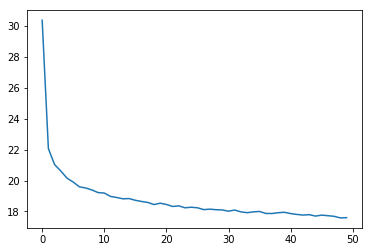

In [37]:
import matplotlib.pyplot as plt
plt.plot(epochs_list, cost_list)